In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sys import argv

In [54]:

def describe(df):
    """
    Program that describe a dataset.
    """
    dfNum = df.select_dtypes(include=['int64','float64'])
    stats = pd.DataFrame(columns=dfNum.columns)
    col_name=stats.columns
    for i in range (len(stats.columns)):
        col = df.loc[:, col_name[i]]
        col_allNum = df.loc[~col.isna(), col_name[i]]
        count = len(col_allNum)
        mean = sum(col_allNum) / len(col_allNum)
        var =  sum([(x - mean)**2 for x in col_allNum])/count
        std = var**(0.5)
        stats.loc['Mean', col_name[i]] = mean
        stats.loc['Std', col_name[i]] = std
    return stats


def normalize_value(df):
    dfNum = df.select_dtypes(include=['int64','float64'])
    stats = describe(dfNum)
    dfN = df.copy()
    for i in range(len(dfNum.columns)):
        mean = stats.loc["Mean", dfNum.columns[i]]
        std = stats.loc["Std", dfNum.columns[i]]
        dfN.loc[:, dfNum.columns[i]] = (dfN.loc[:, dfNum.columns[i]] - mean) / std
    return dfN


def computeCost(X, y, w, b, lambda_ = 1):
    """
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters
    b (scalar)      : model parameter
    lambda_ (scalar): Controls amount of regularization
    Returns:
        cost (scalar):  cost
    """
    m, n = X.shape
    y_slytherin, y_ravenclaw, y_gryffindor, y_hufflepuff = y
    w_slytherin, w_ravenclaw, w_gryffindor, w_hufflepuff = w
    b_slytherin, b_ravenclaw, b_gryffindor, b_hufflepuff = b
    cost_slytherin = 0
    cost_ravenclaw = 0
    cost_gryffindor = 0
    cost_hufflepuff = 0
    for i in range(m):
        z_slytherin = np.dot(w_slytherin, X.iloc[i].values) + b_slytherin
        f_wb_slytherin = 1 / (1 + np.exp(-z_slytherin))
        cost_slytherin += -y_slytherin[i] * np.log(f_wb_slytherin) - (1 - y_slytherin[i])*np.log(1-f_wb_slytherin)
        
        z_ravenclaw = np.dot(w_ravenclaw, X.iloc[i].values) + b_ravenclaw
        f_wb_ravenclaw = 1 / (1 + np.exp(-z_ravenclaw))
        cost_ravenclaw += -y_ravenclaw[i] * np.log(f_wb_ravenclaw) - (1 - y_ravenclaw[i])*np.log(1-f_wb_ravenclaw)
        
        z_gryffindor = np.dot(w_gryffindor, X.iloc[i].values) + b_gryffindor
        f_wb_gryffindor = 1 / (1 + np.exp(-z_gryffindor))
        cost_gryffindor += -y_gryffindor[i] * np.log(f_wb_gryffindor) - (1 - y_gryffindor[i])*np.log(1-f_wb_gryffindor)

        z_hufflepuff = np.dot(w_hufflepuff, X.iloc[i].values) + b_hufflepuff
        f_wb_hufflepuff = 1 / (1 + np.exp(-z_hufflepuff))
        cost_hufflepuff += -y_hufflepuff[i] * np.log(f_wb_hufflepuff) - (1 - y_hufflepuff[i])*np.log(1-f_wb_hufflepuff)
    
    cost_slytherin = cost_slytherin / m
    cost_ravenclaw = cost_ravenclaw / m
    cost_gryffindor = cost_gryffindor / m
    cost_hufflepuff = cost_hufflepuff / m

    reg_part_slytherin = 0
    reg_part_ravenclaw = 0
    reg_part_gryffindor = 0
    reg_part_hufflepuff = 0

    for i in range(n):
        reg_part_slytherin += w_slytherin[i]**2
        reg_part_ravenclaw += w_ravenclaw[i]**2
        reg_part_gryffindor += w_gryffindor[i]**2
        reg_part_hufflepuff += w_hufflepuff[i]**2

    cost_slytherin = cost_slytherin + (lambda_ / (2*m)) * reg_part_slytherin
    cost_ravenclaw = cost_ravenclaw + (lambda_ / (2*m)) * reg_part_ravenclaw
    cost_gryffindor = cost_gryffindor + (lambda_ / (2*m)) * reg_part_gryffindor
    cost_hufflepuff = cost_hufflepuff + (lambda_ / (2*m)) * reg_part_hufflepuff

    return (cost_slytherin, cost_ravenclaw, cost_gryffindor, cost_hufflepuff)


def updateWb(X, y, w, b, lambda_, alpha):
    m, n = X.shape
    dj_dw = np.array([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)])
    dj_db = np.zeros(4)
    y_slytherin, y_ravenclaw, y_gryffindor, y_hufflepuff = y
    w_slytherin, w_ravenclaw, w_gryffindor, w_hufflepuff = w
    b_slytherin, b_ravenclaw, b_gryffindor, b_hufflepuff = b
    for i in range(m):
        z_slytherin = np.dot(X.iloc[i].values, w_slytherin) + b_slytherin
        f_wb_i_slytherin = 1 / (1 + np.exp(-z_slytherin))
        err_i_slytherin  = f_wb_i_slytherin  - y_slytherin[i]

        z_ravenclaw = np.dot(X.iloc[i].values, w_ravenclaw) + b_ravenclaw
        f_wb_i_ravenclaw = 1 / (1 + np.exp(-z_ravenclaw))
        err_i_ravenclaw  = f_wb_i_ravenclaw  - y_ravenclaw[i]
        
        z_gryffindor = np.dot(X.iloc[i].values, w_gryffindor) + b_gryffindor
        f_wb_i_gryffindor = 1 / (1 + np.exp(-z_gryffindor))
        err_i_gryffindor  = f_wb_i_gryffindor  - y_gryffindor[i]

        z_hufflepuff = np.dot(X.iloc[i].values, w_hufflepuff) + b_hufflepuff
        f_wb_i_hufflepuff = 1 / (1 + np.exp(-z_hufflepuff))
        err_i_hufflepuff = f_wb_i_hufflepuff  - y_hufflepuff[i]

        for j in range(n):
            dj_dw[0][j] = dj_dw[0][j] + err_i_slytherin * X.iloc[i,j].item()
            dj_dw[1][j] = dj_dw[1][j] + err_i_ravenclaw * X.iloc[i,j].item()
            dj_dw[2][j] = dj_dw[2][j] + err_i_gryffindor * X.iloc[i,j].item()
            dj_dw[3][j] = dj_dw[3][j] + err_i_hufflepuff * X.iloc[i,j].item()
        
        dj_db[0] = dj_db[0] + err_i_slytherin
        dj_db[1] = dj_db[1] + err_i_ravenclaw
        dj_db[2] = dj_db[2] + err_i_gryffindor
        dj_db[3] = dj_db[3] + err_i_hufflepuff
        
    dj_dw =  dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[0][j] = dj_dw[0][j] + (lambda_/m) * w_slytherin[j]
        dj_dw[1][j] = dj_dw[1][j] + (lambda_/m) * w_ravenclaw[j]
        dj_dw[2][j] = dj_dw[2][j] + (lambda_/m) * w_gryffindor[j]
        dj_dw[3][j] = dj_dw[3][j] + (lambda_/m) * w_hufflepuff[j]
    
    W_updated = w - alpha * dj_dw
    b_updated = b - alpha * dj_db
    return (W_updated, b_updated)


def executeGradientDescentAlgo(X, y, alpha, lambda_, nb_iterations):
    m, n = X.shape
    w = np.array([np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)])
    b = np.zeros(4)
    result = np.array([np.zeros(nb_iterations), np.zeros(nb_iterations), np.zeros(nb_iterations), np.zeros(nb_iterations)])
    for i in tqdm(range(nb_iterations)):
        w, b = updateWb(X, y, w, b, lambda_, alpha)
        result[0][i], result[1][i], result[2][i], result[3][i] = computeCost(X, y, w, b, lambda_)
    return(w, b, result)


def logreg(df, alpha, lambda_, nb_iterations):
    # On supprime les valeurs NaN
    for i in range(len(df.columns)):
        df = df.loc[~df.isna()[df.columns[i]], :]

    # On ajoute les test
    slytherin_df = df.copy()
    slytherin_df.loc[:, "Test Slytherin"] = 0
    slytherin_df.loc[df.loc[:,"Hogwarts House"] == "Slytherin", "Test Slytherin"] = 1
    ravenclaw_df= df.copy()
    ravenclaw_df.loc[:, "Test Ravenclaw"] = 0
    ravenclaw_df.loc[df.loc[:,"Hogwarts House"] == "Ravenclaw", "Test Ravenclaw"] = 1
    gryffindor_df= df.copy()
    gryffindor_df.loc[:, "Test Gryffindor"] = 0
    gryffindor_df.loc[df.loc[:,"Hogwarts House"] == "Gryffindor", "Test Gryffindor"] = 1
    hufflepuff_df= df.copy()
    hufflepuff_df.loc[:, "Test Hufflepuff"] = 0
    hufflepuff_df.loc[df.loc[:,"Hogwarts House"] == "Hufflepuff", "Test Hufflepuff"] = 1
    slytherin_df.drop("Hogwarts House", axis=1, inplace=True)
    ravenclaw_df.drop("Hogwarts House", axis=1, inplace=True)
    gryffindor_df.drop("Hogwarts House", axis=1, inplace=True)
    hufflepuff_df.drop("Hogwarts House", axis=1, inplace=True)

    X = slytherin_df.iloc[:, :len(slytherin_df.columns)-1]
    y = np.array([slytherin_df.iloc[:, len(slytherin_df.columns)-1:].to_numpy()[:, 0],
         ravenclaw_df.iloc[:, len(ravenclaw_df.columns)-1:].to_numpy()[:, 0], 
         gryffindor_df.iloc[:, len(gryffindor_df.columns)-1:].to_numpy()[:, 0], 
         hufflepuff_df.iloc[:, len(hufflepuff_df.columns)-1:].to_numpy()[:, 0]])
    return (executeGradientDescentAlgo(X, y, alpha, lambda_, nb_iterations))


def plot_algo_convergence(data_to_plot):
    nb_plot = len(data_to_plot)
    x = range(len(data_to_plot[0][1]))
    for i in range(nb_plot):
        plt.plot(x, data_to_plot[i][1], label = data_to_plot[i][0])
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Evolution of the Cost with gradient descent iterations")
    plt.legend()
    plt.show()

In [27]:
df = pd.read_csv("../datasets/dataset_train.csv", index_col = "Index")

In [29]:
df_bis = df.drop(['First Name', 'Last Name', "Birthday", "Best Hand"], axis=1, inplace=False)

In [30]:
df_bis.drop("Astronomy", axis=1, inplace=True)
df_bis.drop("Arithmancy", axis=1, inplace=True)
df_bis.drop("Care of Magical Creatures", axis=1, inplace=True)

In [31]:
stats = describe(df_bis)

In [32]:
df_Normilised = normalize_value(df_bis)

In [48]:
data_to_plot = []

In [58]:
alpha = 0.5
lambda_ = 1
w, b, result = logreg(df_Normilised, alpha, lambda_, 250)
result_sly, result_rav, result_gryf, result_huf = result
data_to_plot.append(["Lamba "+ str(lambda_) + ", alpha " + str(alpha) + ", Slytherin", result_sly])

100%|██████████| 250/250 [02:34<00:00,  1.62it/s]


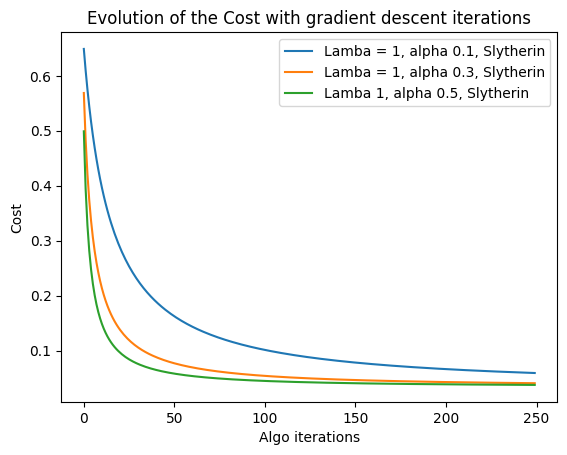

In [59]:
plot_algo_convergence(data_to_plot)